In [ ]:
# modules needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# if using colab
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
# accesing the dataset
data = pd.read_csv('dataset.csv')
data.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [ ]:
data['Mental_Health_Status'].value_counts()

,count
Mental_Health_Status,
Excellent,2518
Good,2508
Fair,2490
Poor,2484


In [ ]:
# cleaning the null values
data.isnull().any()

,0
User_ID,False
Age,False
Gender,False
Technology_Usage_Hours,False
Social_Media_Usage_Hours,False
Gaming_Hours,False
Screen_Time_Hours,False
Mental_Health_Status,False
Stress_Level,False
Sleep_Hours,False


In [ ]:
# checking for duplicate values
data.duplicated().any()

False

In [ ]:
print(data)

         User_ID  Age  Gender  Technology_Usage_Hours  \
0     USER-00001   23  Female                    6.57   
1     USER-00002   21    Male                    3.01   
2     USER-00003   51    Male                    3.04   
3     USER-00004   25  Female                    3.84   
4     USER-00005   53    Male                    1.20   
...          ...  ...     ...                     ...   
9995  USER-09996   42    Male                    7.05   
9996  USER-09997   31   Other                    3.12   
9997  USER-09998   23    Male                    4.38   
9998  USER-09999   38    Male                    4.44   
9999  USER-10000   41    Male                    2.50   

      Social_Media_Usage_Hours  Gaming_Hours  Screen_Time_Hours  \
0                         6.00          0.68              12.36   
1                         2.57          3.74               7.61   
2                         6.14          1.26               3.16   
3                         4.48          2.59   

In [ ]:
# converting word data into numeric
def encoder(df):
  label_encoder = LabelEncoder()
  for col in data:
    if df[col].dtype == 'object':
      df[col] = label_encoder.fit_transform(df[col])
  return df # Added return statement to return the modified DataFrame

In [ ]:
data.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


In [ ]:
data_copy = data.copy()
df = encoder(data_copy)
df = df.drop('User_ID', axis=1)
df.head()

,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,23,0,6.57,6.00,0.68,12.36,2,1,8.01,6.71,0,0,1
1,21,1,3.01,2.57,3.74,7.61,3,0,7.28,5.88,1,2,0
2,51,1,3.04,6.14,1.26,3.16,1,0,8.04,9.81,0,0,0
3,25,0,3.84,4.48,2.59,13.08,0,2,5.62,5.28,1,0,1
4,53,1,1.20,0.56,0.29,12.63,2,1,5.55,4.00,0,2,1


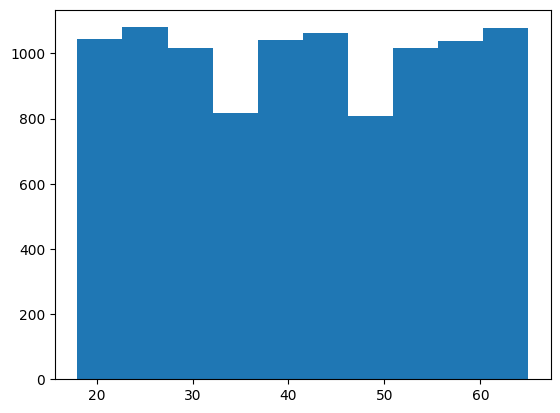

In [ ]:
# data visualization
plt.hist(df['Age'])
plt.show()

In [ ]:
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                               Age  Technology_Usage_Hours  \
Age                       1.000000                0.017455   
Technology_Usage_Hours    0.017455                1.000000   
Social_Media_Usage_Hours  0.009151                0.023199   
Gaming_Hours              0.005204                0.014364   
Screen_Time_Hours         0.007169                0.007947   
Sleep_Hours              -0.001513               -0.009804   
Physical_Activity_Hours  -0.004526                0.010232   

                          Social_Media_Usage_Hours  Gaming_Hours  \
Age                                       0.009151      0.005204   
Technology_Usage_Hours                    0.023199      0.014364   
Social_Media_Usage_Hours                  1.000000      0.005812   
Gaming_Hours                              0.005812      1.000000   
Screen_Time_Hours                        -0.008401     -0.007817   
Sleep_Hours                               0.004443      0.010393   
Physical_Activity_Hours    

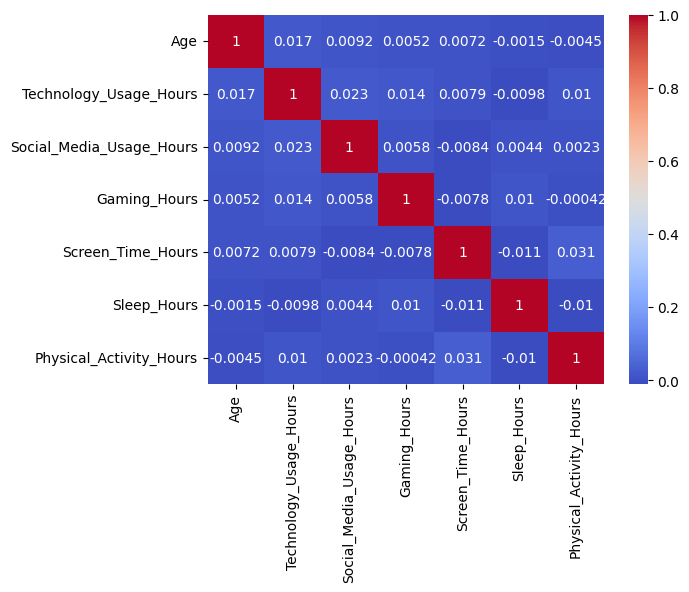

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

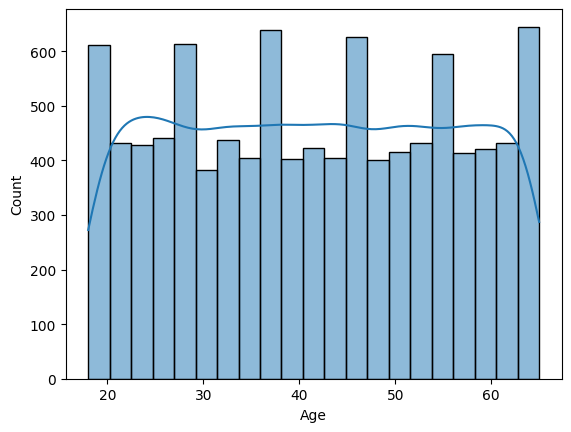

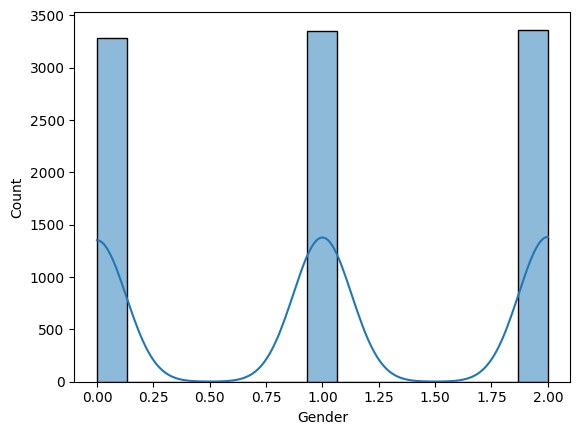

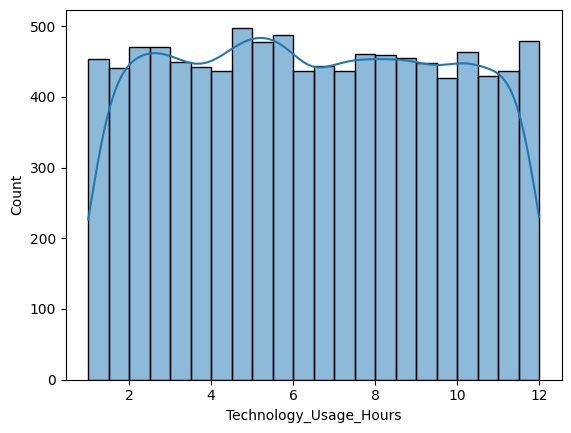

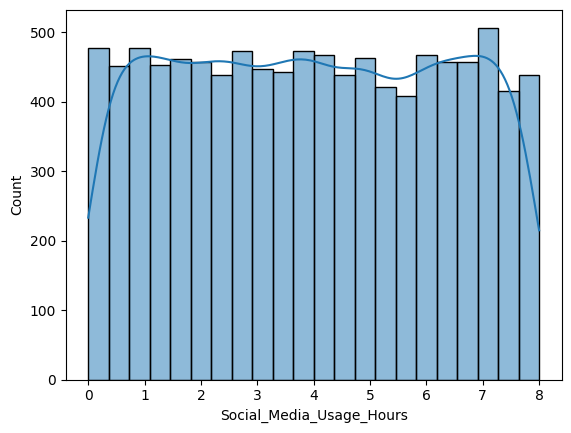

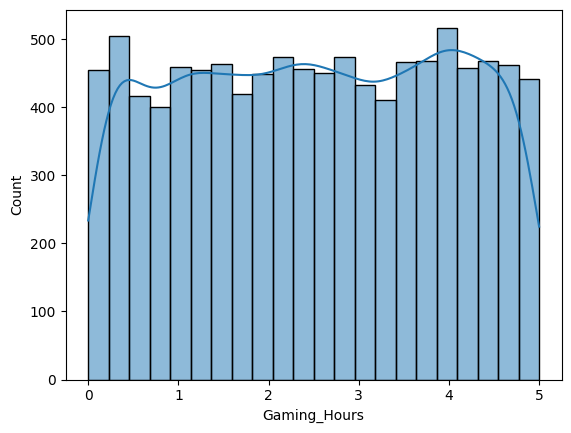

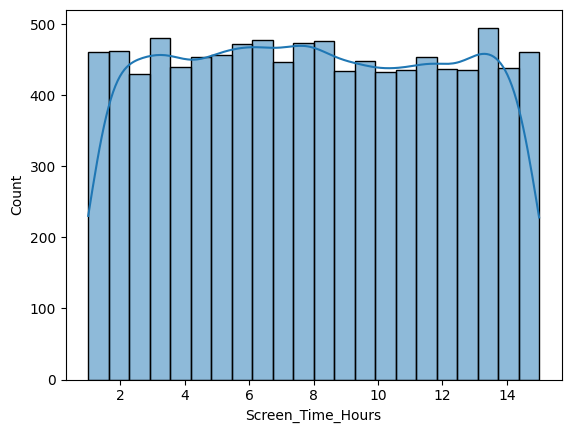

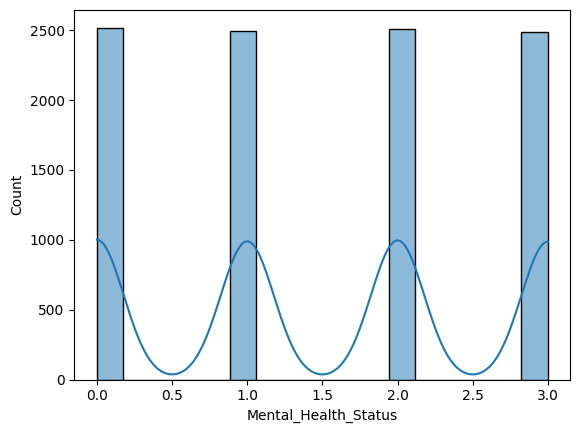

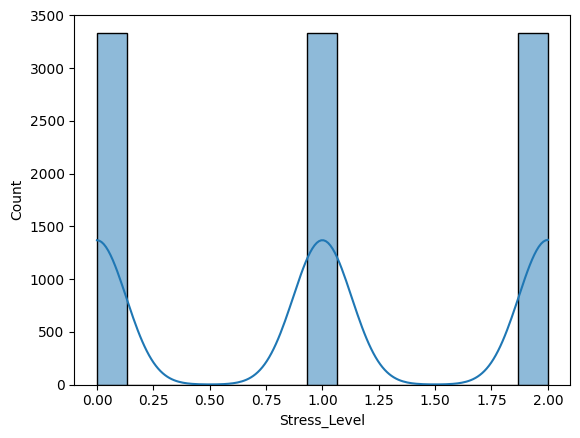

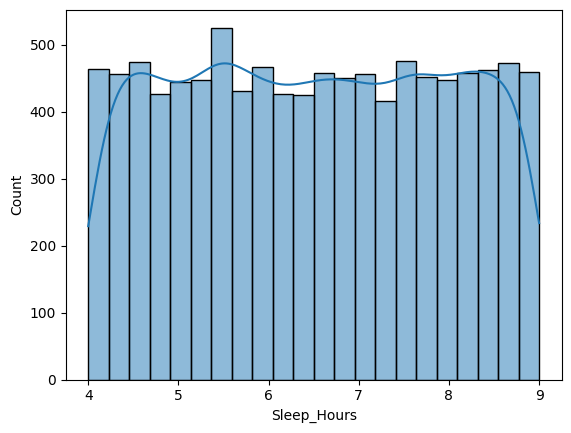

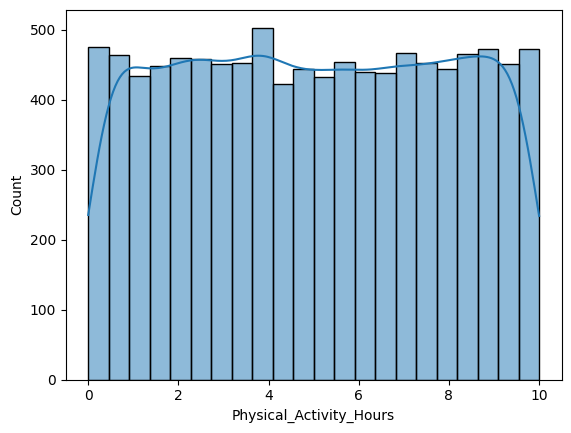

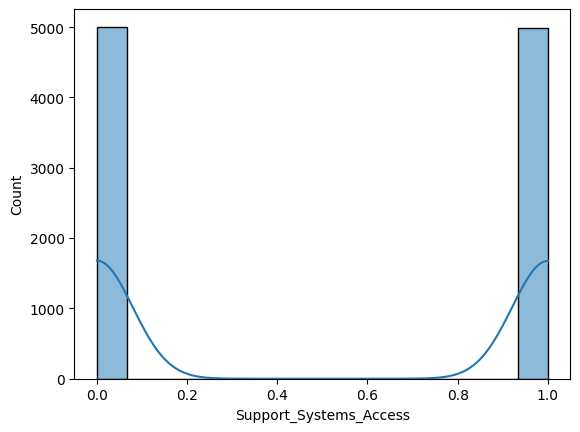

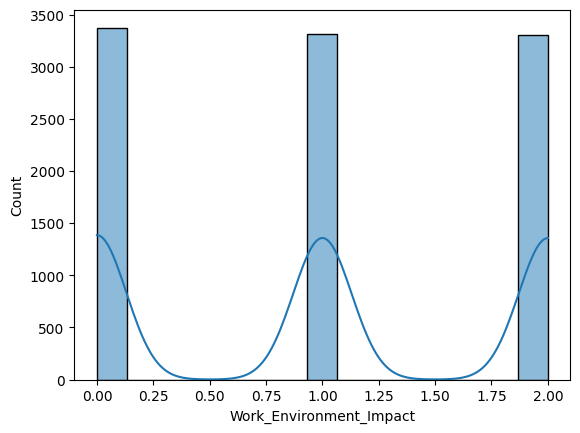

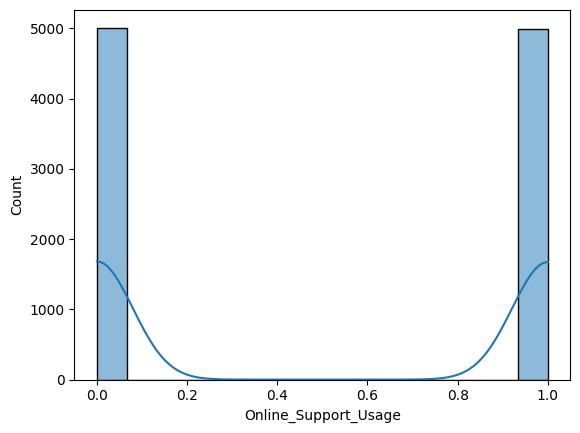

In [ ]:
for col in df:
    sns.histplot(x=col, data=df, kde=True)
    plt.show()